<a href="https://colab.research.google.com/github/rajagopalmotivate/MLinQuantamScience/blob/main/Nandri_Nandri_DM21_DistributeCompute_ver_J200_12_Jun_2022_WORKS_Well_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple comparision of DFT vs NN 
## Hypothesis: NN performs as good as DFT 
## Experiment: Compare 

In [1]:
EXPNO ='EXP_2000_N'

dictPeriodicTable = {'N': 7}
 
elementname ='N' 


In [2]:
firstTimeorRestart = True

#  basis set and as per DM21 authors
For all benchmarking, we use the large aug'-def2-QZVP basis set  

During training, 
For all the atoms and diatomic molecules in the regression set we generate the features for
the SCF loss at PySCF grid level 2 and use the largest basis set in the aug-pc-X family such
that the number of basis functions is less than 128. 
For larger neutral molecules we use grid
level 1 and the largest basis set with less than 128 basis functions from cc-pCV(Q+d)Z, ccpCV(T+d)Z, cc-pV(T+d)Z or cc-pV(D+d)Z

In [3]:
listBasisSet = ['6-21g' , 'cc-pvqz' , 'def2-qzvp'  ]

listBasisSet = ['def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-21g']

listBasisSet = ['cc-pCVDZ' , 'def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-31g', 'STO-3G' , 'def2-QZVPPD' ]

listBasisSet = ['def2-QZVP' , 'cc-pCVTZ', 'cc-pVQZ' , 'cc-pVXZ', 'aug-cc-pV(Q+d)Z' , '6-31g' ]

listBasisSet = [   'cc-pVQZ' , 'def2-QZVP' , 'cc-pCVTZ',  'cc-pVXZ' , '6-31g' ]

listBasisSet = [   'cc-pVQZ' , 'def2-QZVP' , 'cc-pCVQZ'  ]

listBasisSet = [   'cc-pVQZ' , 'cc-pVTZ', 'cc-pVDZ',  'cc-pCVQZ', 'cc-pCV5Z',  'def2-QZVP', 'def2-TCVPPD', '6-31g' ,'STO-3G'   ]

listBasisSet = [   'cc-pVQZ', 'def2-QZVP']

listBasisSet = [  'cc-pV7Z', 'cc-pV6Z',  'cc-pVQZ' , 'cc-pVDZ' , 'cc-pCVQZ',    'def2-QZVP', 'def2-7CVPPD', '6-31g' ,'STO-3G'   ]


listBasisSet = [ 'cc-pVQZ' , 'cc-pVDZ' , "aug'-def2-QZVP", '6-31g' , 'aug-pcJ-4', 'cc-pCV(Q+d)Z']

listBasisSet = [ 'cc-pVQZ' , 'cc-pVDZ' , 'def2-QZVP', '6-31g' ]

#listBasisSet = [ 'cc-pVQZ' , "aug'-def2-QZVP"]
 

In [4]:
#dictPeriodicTable = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10 }

#dictPeriodicTable = {'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10 , 'Na':11, 'Mg':12 , 'Al':13, 'Si':14, 'P':15, 'S':16 , 'Cl':17, 'Ar':18}

 
dictPeriodicTableSpinValues = {'H': 1,  'He': 0, 'Li': 1, 'Be': 0, 'B': 1, 'C': 0, 'N': 1, 'O': 0, 'F': 1, 'Ne': 0 }



print(str( 'Weight'  + ' ' +   ' \t Element     \t  SPIN'    ))
 
 
  


Weight  	 Element     	  SPIN


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Install

In [6]:
#!pip install git+git://github.com/deepmind/deepmind-research.git#subdirectory=density_functional_approximation_dm21

In [7]:
!git clone https://github.com/deepmind/deepmind-research.git


Cloning into 'deepmind-research'...
remote: Enumerating objects: 2581, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 2581 (delta 55), reused 201 (delta 54), pack-reused 2372
Receiving objects: 100% (2581/2581), 92.05 MiB | 29.57 MiB/s, done.
Resolving deltas: 100% (1204/1204), done.


In [8]:
cd deepmind-research/density_functional_approximation_dm21


/content/deepmind-research/density_functional_approximation_dm21


In [9]:
pwd

'/content/deepmind-research/density_functional_approximation_dm21'

In [10]:
!pip install .


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/deepmind-research/density_functional_approximation_dm21
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 37.5 MB 1.1 MB/s 
  Created wheel for density-functional-approximation-dm21: filename=density_functional_approximation_dm21-0.1-py3-none-any.whl size=6085418 sha256=c4e9b46b558aaa0b479ca4581e66b4ae045a2e7dd1031ac4a6aa4924adf40580
  Stored in directory: /tmp/pip-ephem-wheel-cache-yf_ugcvz/wheels/3b/c5/70/0200d858561857222265157381fd4ad73ce078117b4821cd36
Successfully built density-functi

## Step 2: Configure RAM optionally

In [11]:
from pyscf import gto
from pyscf import dft

from pyscf import __config__
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

4000

In [12]:
import psutil
systemresources = psutil.virtual_memory()

MAX_MEMORY = round( systemresources.available  * 0.00009)
PYSCF_MAX_MEMORY  = MAX_MEMORY

print('Configured to use max RAM resources of  ' + str(MAX_MEMORY))

Configured to use max RAM resources of  1112130


In [13]:
setattr(__config__, 'MAX_MEMORY', PYSCF_MAX_MEMORY)

setattr(__config__, 'PYSCF_MAX_MEMORY', PYSCF_MAX_MEMORY)



In [14]:
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

1112130

## Step 3: 

### 3.1 Define the periodic table (Define atomic weight and periodic weight for each element)

### 3.2 Define the spin value for each element 

### 3.3 You can load any new basis function.  Just visit the Basics Exchange and get a new Basis Function URL .  
#### here we download a basis set full defintion file from an URL and then use it to construct a molecule  

#### To get a web URL, just visit https://www.basissetexchange.org/


http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf 

https://youtu.be/irQ_c_fW5f8?t=971


1.   cc-pCVXZ or aug-cc-pCVXZ basis sets;  you should use basis sets like this if you do not freeze core
2.   cc-pVQZ is great for CCSD(T)



In [15]:
def trydownloadingBasisSet(ElementsinMolecule, BasisSet, versionno):  
    target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionno)+'&elements=' + str(ElementsinMolecule) 
    #print(target_url)
    try:
      textfile = urllib.request.urlopen(target_url)    
      mydownloadedfile = ""
      for line in textfile:
          #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
          mydownloadedfile += line.decode('utf-8') 
      return True    
    except:
      return False

In [16]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff


def getValidBasisSet(MoleculeList):
  ValidatedBasisSet = []
  ValBSSetVersionNumberDict = {}
  errorproneBasisSet = []
  for BasisSet in listBasisSet:
    didnotworkatallforanyversion = True
    for versionno in range(0,4):
      isworking = trydownloadingBasisSet(MoleculeList, BasisSet, versionno)
      if isworking == True:
        didnotworkatallforanyversion = False
        ValBSSetVersionNumberDict[BasisSet] = versionno
        ValidatedBasisSet.append(BasisSet)
        break
    if didnotworkatallforanyversion == True:
      errorproneBasisSet.append(BasisSet)
  return ValidatedBasisSet 

In [17]:
def downloadBasisSetAutoVersion(ElementsinMolecule, BasisSet):  
    for versionumber in range (0,4):
      target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionumber)+'&elements=' + str(ElementsinMolecule) 
      try:
        textfile = urllib.request.urlopen(target_url)    
        mydownloadedfile = ""
        for line in textfile:
            #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
            mydownloadedfile += line.decode('utf-8') 
        return mydownloadedfile    
      except:
        return None

In [18]:

PerdiocTableNumber = dictPeriodicTable [elementname]
ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
len(ValidatedBasisSet)
ValidatedBasisSet

['cc-pVQZ', 'cc-pVDZ', 'def2-QZVP', '6-31g']

In [19]:
basisSethandpicked =[  ]

In [20]:
#listBasisSet = basisSet652

In [21]:
try:
  print("Hello")
except:
  print("Something went wrong")
else:
  print("Nothing went wrong")

Hello
Nothing went wrong


In [22]:
#downloadBasisSetAutoVersion(1,'3-21G')

geomtery optimization

In [23]:
!	pip install -U pyberny


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from pyscf import gto
from pyscf import scf
from pyscf import cc
from pyscf.cc import ccsd_t_lambda_slow as ccsd_t_lambda
from pyscf.grad import ccsd_t as ccsd_t_grad
from pyscf.geomopt import berny_solver

def f_usefforberny_solver(mol):
    # Compute CCSD(T) energy
    mf = scf.RHF(mol).run()
    mycc = cc.CCSD(mf).run()
    et_correction = mycc.ccsd_t()
    e_tot = mycc.e_tot + et_correction

    # Compute CCSD(T) gradients
    g = ccsd_t_grad.Gradients(mycc).kernel()
    print('CCSD(T) nuclear gradients:')
    print(g)
    return e_tot, g


In [25]:
 hashLookUpMolecules = dict()
 

In [26]:
def GetoptimizedMolecule(randomMol):
  global hashLookUpMolecules
  print('****************************************************************GEOMENTRY OPTIMIZATION Starts***********************************************')  
  print('MOLECULE KEY is')
  print([randomMol.basis])
  if randomMol in hashLookUpMolecules:
    saved_mol = hashLookUpMolecules[randomMol]
    print('****************************************************************GEOMENTRY looked up from Hashtable***********************************************')  
    return saved_mol
  fake_method = berny_solver.as_pyscf_method(randomMol, f_usefforberny_solver)
  new_mol = berny_solver.optimize(fake_method , maxsteps=400)
  print('Old geometry (Bohr)')
  print(randomMol.atom_coords())  
  print('New geometry (Bohr)')
  print(new_mol.atom_coords())  
  hashLookUpMolecules[randomMol] = new_mol
  print('****************************************************************GEOMENTRY OPTIMIZATION Ends***********************************************')  
  return new_mol


DM21

In [27]:
import density_functional_approximation_dm21 as dm21
from pyscf import gto
from pyscf import dft

Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
import pandas as pd
import numpy as np

In [29]:
def buildaMoleculeSpin(elementname, elementname2, mydownloadedfile, mydownloadedfile2, trythisspin ):
      mol = gto.Mole()
      mol.atom = '''
      N	0.0000000	0.0000000	0.5490440
      N	0.0000000	0.0000000	-0.5490440
      '''
      mol.unit = 'Angstrom'
   #   mol.atom = [[elementname, ( 0, 0, 0)], [elementname2, (0, 0, 1)] ]
      mol.spin =  trythisspin
      mol.symmetry = True
      mol.basis = { elementname: gto.parse(mydownloadedfile)  ,     elementname2: gto.parse(mydownloadedfile2)        }
      #mol.max_memory = PYSCF_MAX_MEMORY
      mol.build()
      return mol


Calculated Geometries available for N2 (Nitrogen diatomic) 1Σg D∞h

https://cccbdb.nist.gov/geom3x.asp?method=63&basis=25
```
CCSD(T)=FULL/cc-pVQZ

Atom	X	Y	Z
N	0.0000000	0.0000000	0.5490440
N	0.0000000	0.0000000	-0.5490440


CCSD(T)=FULL/cc-pVDZ

Atom	x (Å)	y (Å)	z (Å)
N1	0.0000	0.0000	0.5488
N2	0.0000	0.0000	-0.5488




In [30]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname2, mydownloadedfile , mydownloadedfile2 ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpin(elementname,elementname2, mydownloadedfile, mydownloadedfile2, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


In [31]:
def buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile,  trythisspin ):
      mol = gto.Mole()
      #mol.atom = '''H 0 0 0'''
      mol.atom = [[elementname, (0, 0, 0)] ]
      mol.spin =  trythisspin
      mol.basis = { elementname: gto.parse(mydownloadedfile)       }
      mol.build()
      return mol

In [32]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT1(elementname,  mydownloadedfile ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


## Step 4: Expected format of output table 

## Step 5. Input values to be considered in this computation  

In [33]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff
import numpy

print( 'No'  + '        ' + 'Element' + '    \t  \t \t ' +  'Basis Set')

for elementname in dictPeriodicTable.keys():
  break
  PerdiocTableNumber = dictPeriodicTable [elementname]
  ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
  print('***********************************************************'+ 'No of Valid basis set = ' + str(len(ValidatedBasisSet)))

  for BasisSet in ValidatedBasisSet:    
    print('***********************************************************')
    print('***********************************************************')
    print('***********************************************************')
                       #downloadBasisSetAutoVersion(1,'3-21G')
    mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BasisSet)
    
    molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, mydownloadedfile , mydownloadedfile)


    if molUnoptimized == None:
      continue

    mol = GetoptimizedMolecule(molUnoptimized)

    continue

    if mol == None:
      continue

    print(mol.atom)
    print(mol.atom_coords(unit='Bohr'))
    print(mol.basis)
    print(str( PerdiocTableNumber)  + '        ' + str(elementname) + '    \t  \t \t ' + str(BasisSet))

    aResultDict = {}
    aResultDict['Weight'] = PerdiocTableNumber
    aResultDict['Element'] = [elementname]
    aResultDict['Molecule'] = [mol.atom]
    aResultDict['BasisSet'] = [BasisSet]
    aResultDict['MolOBJECT'] = mol
    aResultDict['BuiltMolecule'] = [  mol.basis   ]

    dfforOneElement = pd.DataFrame(aResultDict )
    df = df.append(dfforOneElement, ignore_index = True)

 


No        Element    	  	 	 Basis Set


## Step 6. Compute Results
## Run the computation for the above input values 

In [34]:
functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' , 'pbe']

functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' ,  'pbe' ,  'pbe0']


#functionalsList = ['b3lyp']

In [35]:
from pyscf import dft

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFTGOLD(mol , functionals ):
  if mol.spin == 0:
    mf = dft.RKS(mol)
  else:
    mf = dft.UKS(mol)
  # functional.
  #mf.xc = 'B3LYP'
  mf.max_memory = PYSCF_MAX_MEMORY
  mf.xc = functionals
  # Run the DFT calculation.
  answerDFT = mf.kernel()
  return answerDFT



In [36]:

# DFT computation of SCF energy  
def SCFenergyFunctionalsbasedonDFT(mol , functionals ):
    mf = mol.KS()
   # mf.xc = 'b3lyp'
   # mf.xc = 'pbe0'
   # mf.xc = 'M06-2X'
   # mf.xc = 'SCAN'    
   # mf.xc = 'wB97X-V'
   # mf.xc = 'PW6B95'
    mf.xc = functionals
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [37]:
def SCFenergyFunctionalsbasedonNNGOLD(mol,  NNfunctionals ):
    if mol.spin == 0:
      mf = dft.RKS(mol)
    else:
      mf = dft.UKS(mol)
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    mf.max_memory = PYSCF_MAX_MEMORY
    mf.conv_tol = 1E-10
    mf.conv_tol_grad = 1E-7    
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [38]:
def SCFenergyFunctionalsbasedonNN(mol,  NNfunctionals, functionals='b3lyp'):
    mf = mol.KS()
    mf.xc = functionals
    #mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21m )
    mf._numint = dm21.NeuralNumInt(NNfunctionals)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [39]:
# DFT computation of SCF energy  
def SCFenergybasedonDFT(mol):
    mf = dft.RKS(mol)
    # Run the DFT calculation.
    answerDFT = mf.kernel()
    return answerDFT

In [40]:
# Neural network based prediction of SCF energy   
def SCFenergybasedonNN(mol):
    mf = dft.RKS(mol)
    mf._numint = dm21.NeuralNumInt(dm21.Functional.DM21)
    # Run the DFT calculation.
    answerNN = mf.kernel()
    return answerNN

In [41]:
# CCSD computation 
def SCFenergybasedonCCSD(mol):
  ccsdanswer = mol.apply('CCSD').run().e_tot
  return ccsdanswer

In [42]:
from pyscf import  scf, cc

# CCSD-T computation 
def SCFenergybasedonCCSDTGOLD(mol):
  try:
    mf = scf.HF(mol).run()
    mf.max_memory = PYSCF_MAX_MEMORY
    mycc = cc.CCSD(mf).run()
    #print('CCSD  energy', mycc.e_tot)
    et = mycc.ccsd_t()
    CCSDTotal = mycc.e_tot + et
  except ZeroDivisionError:
    print('000000000000000000000000000000000000000-------CCSDT Error------------00000000000000000000000. Using CCSD')
    return SCFenergybasedonCCSD(mol)
  #print('CCSD(T) total energy', mycc.e_tot + et)
  return CCSDTotal

  

In [43]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff
import numpy
from google.colab import files


print( 'No'  + '        ' + 'Element' + '    \t  \t \t ' +  'Basis Set')



No        Element    	  	 	 Basis Set


In [44]:
ValidatedBasisSetSOURCE = getValidBasisSet(PerdiocTableNumber)


In [45]:


def compute1Mol1BasisSet(elementname, ValidatedBasisSetStart , df):
  if True:
    PerdiocTableNumber = dictPeriodicTable [elementname]
    ValidatedBasisSet = ValidatedBasisSetSOURCE[ValidatedBasisSetStart:ValidatedBasisSetStart+1]
    for BasisSet in ValidatedBasisSet:    
      print('***********************************************************')
      print('***********************************************************')
      print('***********************************************************')

      mydownloadedfile = downloadBasisSetAutoVersion(PerdiocTableNumber,BasisSet)      
      molUnoptimized, myspin = buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname, mydownloadedfile , mydownloadedfile )
      if molUnoptimized == None:
        return df

      print('.............................................Molecule details......................................................')
      print(molUnoptimized)
      print('In Bohr')
      print(molUnoptimized.atom_coords(unit='Bohr'))
      print('In angstrom')
      print(molUnoptimized.atom_coords(unit='ANG'))


     # mol = GetoptimizedMolecule(molUnoptimized)
      mol = molUnoptimized
        
      print(mol.atom)
      print(mol.atom_coords(unit='Bohr'))
      print(mol.basis)
      print(str( PerdiocTableNumber)  + '        ' + str(elementname) + '    \t  \t \t ' + str(BasisSet))     
      print('.............................................COMPUTING SCF energy......................................................')

      aResultDict = computePart(mol )


      aResultDict['BasisSet'] = [BasisSet]

      dfforOneElement = pd.DataFrame(aResultDict )
      df = df.append(dfforOneElement, ignore_index = True)
      df.to_csv('ComputedEnergy'+str(ValidatedBasisSetStart)+'.csv')
      df.to_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE'+str(ValidatedBasisSetStart)+'.csv' )
      print(EXPNO+ 'CE'+str(ValidatedBasisSetStart)+'.csv')
      return df


    #  files.download('ComputedEnergy'+str(ValidatedBasisSetStart)+'.csv')


      


In [46]:



def computePart(mol):
  if True:
      aResultDict = {}
      aResultDict['Weight'] = PerdiocTableNumber
      aResultDict['Element'] = [elementname]
      aResultDict['Molecule'] = [mol.atom]
      aResultDict['Spin'] = [mol.spin]
      aResultDict['BuiltMolecule'] = [  mol.basis   ]

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD ++++++++++++++++++++++++++++++++++')
      # Run the CCSD calculation.
      CCSDenergy = SCFenergybasedonCCSD(mol)
      print('ENERGY Computing using CCSD appoach is = ' + str(CCSDenergy ))
      print('++++++++++++++++++++++++++++++++++++++++++++++++++  CCSD(T) ++++++++++++++++++++++++++++++++++')
      CCSDTenergy = SCFenergybasedonCCSDTGOLD(mol)
      print('ENERGY Computing using CCSD T appoach is = ' + str(CCSDTenergy ))


      #aResultDict['DFTApproach'] = answerDFT
      #aResultDict['NNApproach'] = answerNN
      aResultDict['CCSD'] = CCSDenergy
      aResultDict['CCSDT'] = CCSDTenergy

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  DFT Functionals ++++++++++++++++++++++++++++++++++')
      for afunctionals in functionalsList:
        ans = SCFenergyFunctionalsbasedonDFTGOLD(mol, afunctionals)
        aResultDict['DFT-'+str(afunctionals)] = ans    

      print('++++++++++++++++++++++++++++++++++++++++++++++++++  DM21 Functionals ++++++++++++++++++++++++++++++++++')
      for aDMFunctionalvalue in dm21.Functional:
        ans = SCFenergyFunctionalsbasedonNNGOLD(mol, aDMFunctionalvalue)
        aResultDict['NN-'+str(aDMFunctionalvalue)] = ans    

      return aResultDict




  


In [47]:
if firstTimeorRestart == True:
  df = pd.DataFrame(columns = ['Weight', 'Element', 'Molecule', 'BasisSet','Spin', 'BuiltMolecule' ])


In [48]:

for i in range(0, len(ValidatedBasisSetSOURCE)):
  try:
    for elementname in dictPeriodicTable.keys():
      df = compute1Mol1BasisSet(elementname, ValidatedBasisSetStart=i , df=df)
  except:
    print('Exception.. continuing')

***********************************************************
***********************************************************
***********************************************************
.............................................Molecule details......................................................
In Bohr
[[ 0.          0.          1.03754279]
 [ 0.          0.         -1.03754279]]
In angstrom
[[ 0.        0.        0.549044]
 [ 0.        0.       -0.549044]]

      N	0.0000000	0.0000000	0.5490440
      N	0.0000000	0.0000000	-0.5490440
      
[[ 0.          0.          1.03754279]
 [ 0.          0.         -1.03754279]]
{'N': [[0, [45840.0, 9.2e-05, 0.0, 0.0, -2e-05, 0.0], [6868.0, 0.000717, 0.0, 0.0, -0.000159, 0.0], [1563.0, 0.003749, 0.0, 0.0, -0.000824, 0.0], [442.4, 0.015532, 0.0, 0.0, -0.003478, 0.0], [144.3, 0.053146, 0.0, 0.0, -0.011966, 0.0], [52.18, 0.146787, 0.0, 0.0, -0.035388, 0.0], [20.34, 0.304663, 0.0, 0.0, -0.080077, 0.0], [8.381, 0.397684, 0.0, 0.0, -0.146722, 0.0], [3.

#validate the energy against NIST bechmarks ..
manually just the ball park number some be matcoed 

Basis Set Extrapolation (BSE) for energy for N2 (Nitrogen diatomic)


https://cccbdb.nist.gov/bseenergy2x.asp shows  
or  http://www.begdb.org/index.php

For N, cc-pVQZ 
*   CCSD =-109.3841360	
CCSD/Full = -109.4428084	
CCSD(T) = -109.4043904	
CCSD(T)FULL	-109.4637930	
*   






## Step 7: The results are below 

#### Explanation of Output table 

#### Input to software  
* Weight' - atomic weight 
* 'Element' - element in periodic table 
*  'Spin'        - This is hardcoded in this project.  No need to give spin in the next project 
* 'BasisSet' - the name of basis set 


#### Generared values based on input 

*   'Molecule' - the pyscf molecule defined 
*   'BasisSetURL'  - The url used to downloaded the basis set 
*    'MolOBJECT' - The pyscf python object instance - internal to code 
*    'Coord'           
*    'BuiltMolecule'  - The molecule coordinates 


#### Generared values based on input 

1.   'DFTApproach' - SCF energy from DFT computation 
2.   'NNApproach'  - SCF energy from Neural network prediction
3.    'CCSDApproach'- SCF energy from CCSD 




In [49]:
for i in range (len(df['Molecule'] )):
  print( df['BasisSet'] [i]    )
  print(  df['Molecule'] [i] )

cc-pVQZ

      N	0.0000000	0.0000000	0.5490440
      N	0.0000000	0.0000000	-0.5490440
      
cc-pVDZ

      N	0.0000000	0.0000000	0.5490440
      N	0.0000000	0.0000000	-0.5490440
      
def2-QZVP

      N	0.0000000	0.0000000	0.5490440
      N	0.0000000	0.0000000	-0.5490440
      
6-31g

      N	0.0000000	0.0000000	0.5490440
      N	0.0000000	0.0000000	-0.5490440
      


In [50]:
del df['BuiltMolecule']

In [51]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.455650,-109.449469,-109.535539,-109.537701,-109.537078,-109.537155
1,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVDZ,0,-109.267243,-109.279191,-109.481039,-109.502551,-109.488362,-109.562545,-109.666747,-109.413419,-109.410406,-109.490796,-109.491940,-109.494445,-109.491373
2,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,def2-QZVP,0,-109.434246,-109.455003,-109.526752,-109.542669,-109.530916,-109.603708,-109.708843,-109.458030,-109.451263,-109.537548,-109.539957,-109.538454,-109.539406
3,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,6-31g,0,-109.095583,-109.103177,-109.417711,-109.426865,-109.425552,-109.494641,-109.600030,-109.353838,-109.343801,-109.431051,-109.431542,-109.432852,-109.432519


In [52]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.455650,-109.449469,-109.535539,-109.537701,-109.537078,-109.537155
1,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVDZ,0,-109.267243,-109.279191,-109.481039,-109.502551,-109.488362,-109.562545,-109.666747,-109.413419,-109.410406,-109.490796,-109.491940,-109.494445,-109.491373
2,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,def2-QZVP,0,-109.434246,-109.455003,-109.526752,-109.542669,-109.530916,-109.603708,-109.708843,-109.458030,-109.451263,-109.537548,-109.539957,-109.538454,-109.539406
3,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,6-31g,0,-109.095583,-109.103177,-109.417711,-109.426865,-109.425552,-109.494641,-109.600030,-109.353838,-109.343801,-109.431051,-109.431542,-109.432852,-109.432519


In [53]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.455650,-109.449469,-109.535539,-109.537701,-109.537078,-109.537155
1,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVDZ,0,-109.267243,-109.279191,-109.481039,-109.502551,-109.488362,-109.562545,-109.666747,-109.413419,-109.410406,-109.490796,-109.491940,-109.494445,-109.491373
2,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,def2-QZVP,0,-109.434246,-109.455003,-109.526752,-109.542669,-109.530916,-109.603708,-109.708843,-109.458030,-109.451263,-109.537548,-109.539957,-109.538454,-109.539406
3,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,6-31g,0,-109.095583,-109.103177,-109.417711,-109.426865,-109.425552,-109.494641,-109.600030,-109.353838,-109.343801,-109.431051,-109.431542,-109.432852,-109.432519


In [54]:
GOLDBasisSET= 'cc-pV6Z'
GOLDBasisSET= 'cc-pVQZ'

In [55]:
import copy 
dfcopy = df.copy()

# Gold CCSD(T) Reference value  

In [56]:
dfspecficrow = dfcopy[dfcopy['BasisSet'] == GOLDBasisSET]



dfspecficrow


,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.45565,-109.449469,-109.535539,-109.537701,-109.537078,-109.537155


In [57]:
ccsdtgoldseries = dfspecficrow['CCSDT']


In [58]:
ccsdtgoldseries

0   -109.463793
Name: CCSDT, dtype: float64

In [59]:
ccsdtgold = ccsdtgoldseries[0]
ccsdtgold

-109.46379310390753

In [60]:
dfcopy['CCSDT_G'] = ccsdtgold

In [61]:
dfcopy

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu,CCSDT_G
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.455650,-109.449469,-109.535539,-109.537701,-109.537078,-109.537155,-109.463793
1,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVDZ,0,-109.267243,-109.279191,-109.481039,-109.502551,-109.488362,-109.562545,-109.666747,-109.413419,-109.410406,-109.490796,-109.491940,-109.494445,-109.491373,-109.463793
2,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,def2-QZVP,0,-109.434246,-109.455003,-109.526752,-109.542669,-109.530916,-109.603708,-109.708843,-109.458030,-109.451263,-109.537548,-109.539957,-109.538454,-109.539406,-109.463793
3,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,6-31g,0,-109.095583,-109.103177,-109.417711,-109.426865,-109.425552,-109.494641,-109.600030,-109.353838,-109.343801,-109.431051,-109.431542,-109.432852,-109.432519,-109.463793


In [62]:
for afunctionals in functionalsList:
  print(str(afunctionals))
  df['E-'+'DFT-'+str(afunctionals)] =  abs(  (df['DFT-'+str(afunctionals) ] - df['CCSDT']  ) * 100  /  df['CCSDT'] )

b3lyp
M06-2X
SCAN
wB97X-V
PW6B95
pbe
pbe0


In [63]:
for aDMFunctionalvalue in list(dm21.Functional):
  print(str(aDMFunctionalvalue))
  df['E-'+'NN-'+str(aDMFunctionalvalue)] = abs( (df['NN-'+str(aDMFunctionalvalue) ] - df['CCSDT']  ) * 100  /  df['CCSDT'] )

Functional.DM21
Functional.DM21m
Functional.DM21mc
Functional.DM21mu


In [64]:
for afunctionals in functionalsList:
  print(str(afunctionals))
  df['M-'+'DFT-'+str(afunctionals)] =   abs  (df['DFT-'+str(afunctionals) ] - df['CCSDT']  ) 


b3lyp
M06-2X
SCAN
wB97X-V
PW6B95
pbe
pbe0


In [65]:
for aDMFunctionalvalue in list(dm21.Functional):
  print(str(aDMFunctionalvalue))
  df['M-'+'NN-'+str(aDMFunctionalvalue)] = abs  (df['NN-'+str(aDMFunctionalvalue) ] - df['CCSDT']  ) 


Functional.DM21
Functional.DM21m
Functional.DM21mc
Functional.DM21mu


In [66]:
df

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,...,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,...,0.075010,0.065395,0.138108,0.242932,0.008143,0.014324,0.071746,0.073908,0.073285,0.073362
1,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVDZ,0,-109.267243,-109.279191,-109.481039,-109.502551,-109.488362,...,0.223360,0.209171,0.283353,0.387556,0.134228,0.131215,0.211605,0.212749,0.215254,0.212181
2,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,def2-QZVP,0,-109.434246,-109.455003,-109.526752,-109.542669,-109.530916,...,0.087666,0.075913,0.148705,0.253840,0.003027,0.003740,0.082545,0.084954,0.083451,0.084403
3,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,6-31g,0,-109.095583,-109.103177,-109.417711,-109.426865,-109.425552,...,0.323688,0.322375,0.391464,0.496853,0.250661,0.240624,0.327874,0.328365,0.329675,0.329342


In [67]:
df.to_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )


In [68]:
dfcopy


for afunctionals in functionalsList:
  print(str(afunctionals))
  dfcopy['M-'+'DFT-'+str(afunctionals)] =   abs  (dfcopy['DFT-'+str(afunctionals) ] - dfcopy['CCSDT_G']  ) 
  

b3lyp
M06-2X
SCAN
wB97X-V
PW6B95
pbe
pbe0


In [69]:
for aDMFunctionalvalue in list(dm21.Functional):
  print(str(aDMFunctionalvalue))
  dfcopy['M-'+'NN-'+str(aDMFunctionalvalue)] = abs  (dfcopy['NN-'+str(aDMFunctionalvalue) ] - dfcopy['CCSDT_G']  ) 


Functional.DM21
Functional.DM21m
Functional.DM21mc
Functional.DM21mu


In [70]:
dfcopy

,Weight,Element,Molecule,BasisSet,Spin,CCSD,CCSDT,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,...,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu
0,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVQZ,0,-109.442893,-109.463793,-109.524641,-109.538803,-109.529188,...,0.075010,0.065395,0.138108,0.242932,0.008143,0.014324,0.071746,0.073908,0.073285,0.073362
1,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,cc-pVDZ,0,-109.267243,-109.279191,-109.481039,-109.502551,-109.488362,...,0.038758,0.024569,0.098751,0.202954,0.050374,0.053387,0.027003,0.028147,0.030652,0.027579
2,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,def2-QZVP,0,-109.434246,-109.455003,-109.526752,-109.542669,-109.530916,...,0.078876,0.067123,0.139915,0.245050,0.005763,0.012530,0.073754,0.076164,0.074660,0.075613
3,7,N,\n N\t0.0000000\t0.0000000\t0.5490440\n ...,6-31g,0,-109.095583,-109.103177,-109.417711,-109.426865,-109.425552,...,0.036928,0.038241,0.030848,0.136237,0.109955,0.119992,0.032742,0.032251,0.030941,0.031274


In [71]:
dfcopy.to_csv('/content/drive/My Drive/DeepMind_' + EXPNO+ '_Gold_Final-.csv' )





Bechnmark dataset , Use this to generate multiple papers (already the water dataset is published with DM21, but there is scope for other datasets .. THen you can take new molecules)
http://www.begdb.org/index.php

https://cccbdb.nist.gov/coreenergy3x.asp?casno=1333740&charge=0&method=63&basis=25

pyscf tutorial 
https://github.com/nmardirossian/PySCF_Tutorial/blob/master/dev_guide.ipynb

visuvalize cube geen

https://programtalk.com/vs2/?source=python/12572/pyscf/tools/cubegen.py
https://www.youtube.com/watch?v=QGyfGCZT110
https://github.com/topics/molecule-viewer


geomtery optimization
https://colab.research.google.com/drive/1apQANgcMv9_waE4av47NJkxxlglklZy3?usp=sharing 

https://www.nature.com/articles/s41598-017-12600-3
https://aip.scitation.org/doi/full/10.1063/5.0004863
https://www.researchgate.net/figure/Outline-of-the-FLO-SIC-method-in-the-so-called-self-consistent-mode-The-SIC-is_fig5_340950498


Quantam ML
https://pennylane.ai/qml/demos_qml.html

#### The table will be automatically downloaded into your laptop as CSV file (excel sheet)

In [72]:
import seaborn as sns
 
 

In [73]:
listofcolumstoplot = ['BasisSet']
for aDMFunctionalvalue in list(dm21.Functional):
  colname = 'M-'+'NN-'+ str(aDMFunctionalvalue)
  listofcolumstoplot.append(colname)


for afunctionals in functionalsList:
  colname = 'M-'+'DFT-'+str(afunctionals)
  listofcolumstoplot.append(colname)


listofcolumstoplot

['BasisSet',
 'M-NN-Functional.DM21',
 'M-NN-Functional.DM21m',
 'M-NN-Functional.DM21mc',
 'M-NN-Functional.DM21mu',
 'M-DFT-b3lyp',
 'M-DFT-M06-2X',
 'M-DFT-SCAN',
 'M-DFT-wB97X-V',
 'M-DFT-PW6B95',
 'M-DFT-pbe',
 'M-DFT-pbe0']

In [74]:
dfplot = dfcopy[listofcolumstoplot]

dfplot

,BasisSet,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu,M-DFT-b3lyp,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0
0,cc-pVQZ,0.071746,0.073908,0.073285,0.073362,0.060847,0.075010,0.065395,0.138108,0.242932,0.008143,0.014324
1,cc-pVDZ,0.027003,0.028147,0.030652,0.027579,0.017246,0.038758,0.024569,0.098751,0.202954,0.050374,0.053387
2,def2-QZVP,0.073754,0.076164,0.074660,0.075613,0.062959,0.078876,0.067123,0.139915,0.245050,0.005763,0.012530
3,6-31g,0.032742,0.032251,0.030941,0.031274,0.046082,0.036928,0.038241,0.030848,0.136237,0.109955,0.119992


In [75]:
len(dfplot)

4

In [76]:
from matplotlib import pyplot
import seaborn

def aplot(dfplot):
  sns.set_style("white")
  sns.set_style("whitegrid")



  #sns.color_palette("hls", 4)
  sns.color_palette("Paired")


  chartsize = (18.7, 8.27)

  fig, ax = pyplot.subplots(figsize=chartsize)
  sns.color_palette("Paired")

  sns.set(font_scale=2)
  sns.axes_style()

  sns.set_style("darkgrid", {"axes.facecolor": ".3"})

  sns.barplot( orient='h' ,    data=dfplot)




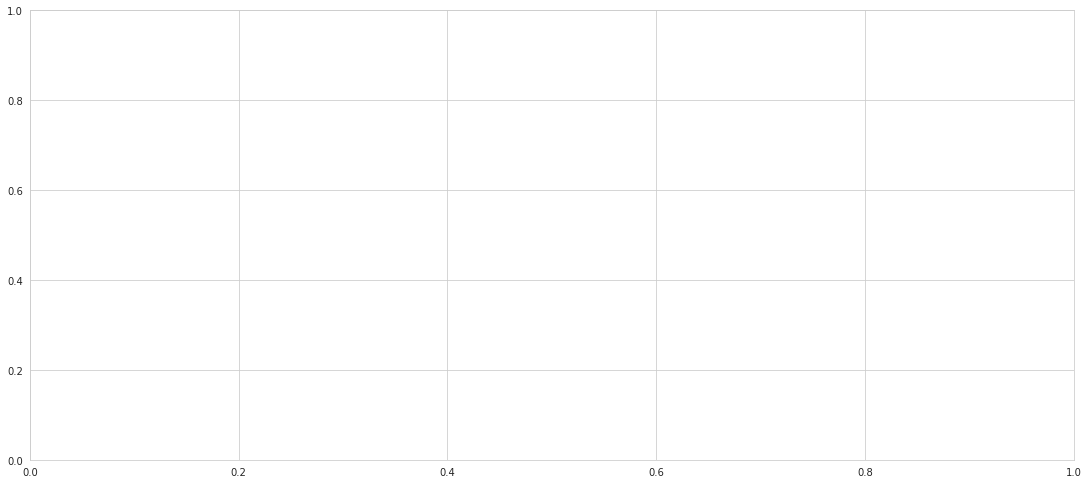

In [77]:
from matplotlib import pyplot
import seaborn

sns.set_style("white")
sns.set_style("whitegrid")



#sns.color_palette("hls", 4)
sns.color_palette("viridis", as_cmap=True)
sns.color_palette("Paired")


chartsize = (18.7, 8.27)

fig, ax = pyplot.subplots(figsize=chartsize)
sns.set(font_scale=2)
sns.axes_style()

sns.set_style("darkgrid", {"axes.facecolor": ".3"})

#sns.barplot( orient='h' ,    data=dfplot)


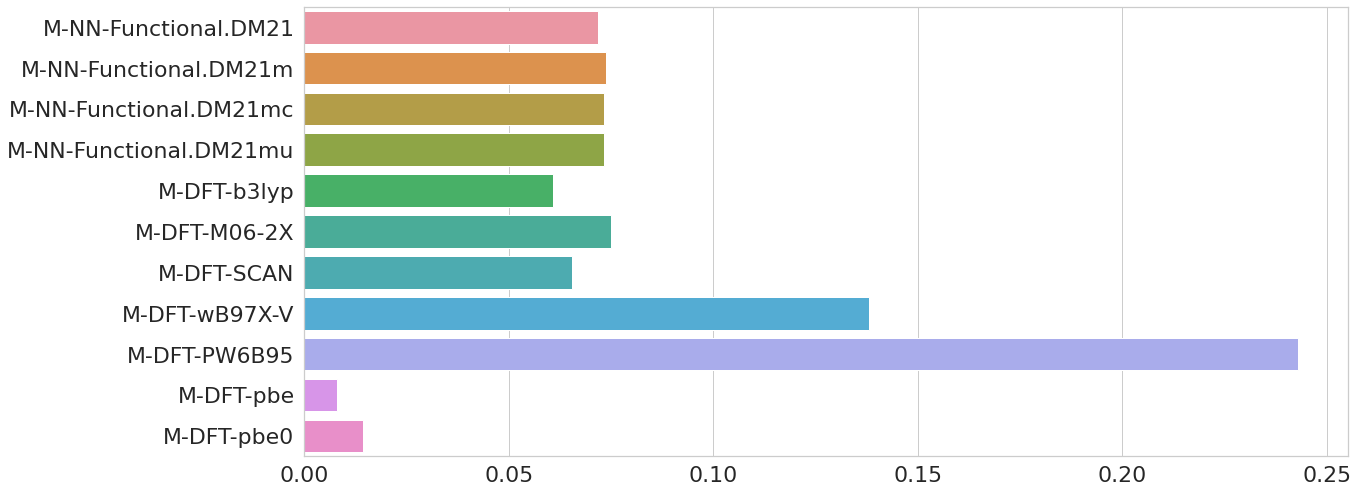

In [78]:
aplot(dfplot[0:1])

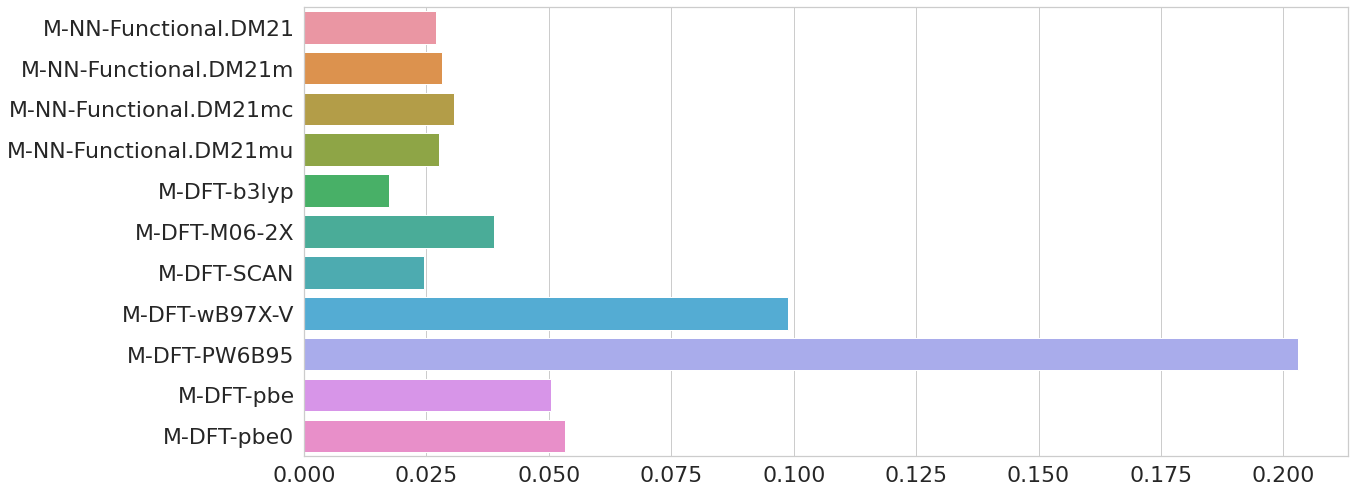

In [79]:
aplot(dfplot[1:2])

In [80]:
listofcolumstoplot2 = ['BasisSet' , 'CCSD',	'CCSDT'	, 'CCSDT_G']
for aDMFunctionalvalue in list(dm21.Functional):
  colname = 'NN-'+ str(aDMFunctionalvalue)
  listofcolumstoplot2.append(colname)


for afunctionals in functionalsList:
  colname = 'DFT-'+str(afunctionals)
  listofcolumstoplot2.append(colname)


listofcolumstoplot2

['BasisSet',
 'CCSD',
 'CCSDT',
 'CCSDT_G',
 'NN-Functional.DM21',
 'NN-Functional.DM21m',
 'NN-Functional.DM21mc',
 'NN-Functional.DM21mu',
 'DFT-b3lyp',
 'DFT-M06-2X',
 'DFT-SCAN',
 'DFT-wB97X-V',
 'DFT-PW6B95',
 'DFT-pbe',
 'DFT-pbe0']

In [81]:
dfplot2 = dfcopy[listofcolumstoplot2]
dfplot2

,BasisSet,CCSD,CCSDT,CCSDT_G,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0
0,cc-pVQZ,-109.442893,-109.463793,-109.463793,-109.535539,-109.537701,-109.537078,-109.537155,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.455650,-109.449469
1,cc-pVDZ,-109.267243,-109.279191,-109.463793,-109.490796,-109.491940,-109.494445,-109.491373,-109.481039,-109.502551,-109.488362,-109.562545,-109.666747,-109.413419,-109.410406
2,def2-QZVP,-109.434246,-109.455003,-109.463793,-109.537548,-109.539957,-109.538454,-109.539406,-109.526752,-109.542669,-109.530916,-109.603708,-109.708843,-109.458030,-109.451263
3,6-31g,-109.095583,-109.103177,-109.463793,-109.431051,-109.431542,-109.432852,-109.432519,-109.417711,-109.426865,-109.425552,-109.494641,-109.600030,-109.353838,-109.343801


In [82]:
dfplot2.min(axis =1, numeric_only=True).min()

-109.70884332403283

In [83]:
dfplot2.max(axis =1, numeric_only=True).max()

-109.0955828688268

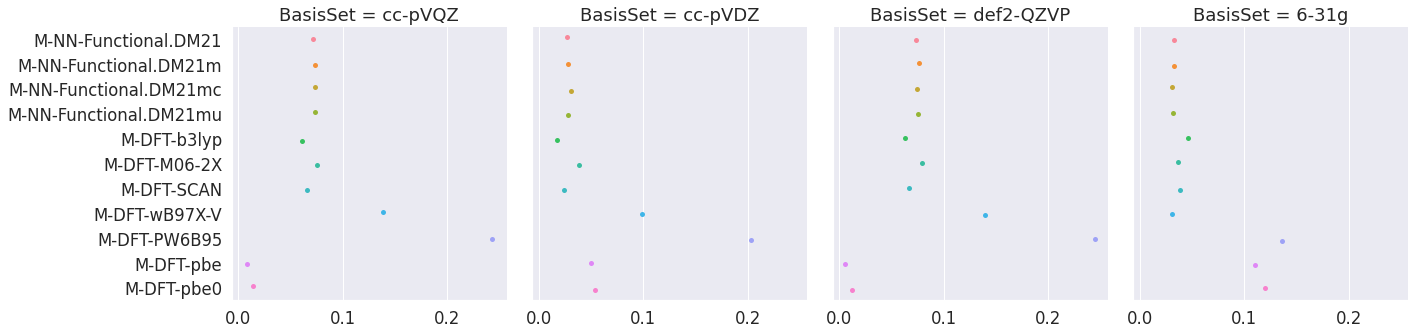

In [84]:
 from matplotlib import pyplot
import seaborn

 

chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplot ,  col="BasisSet")


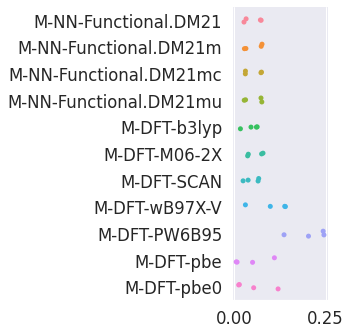

In [85]:
chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplot  )

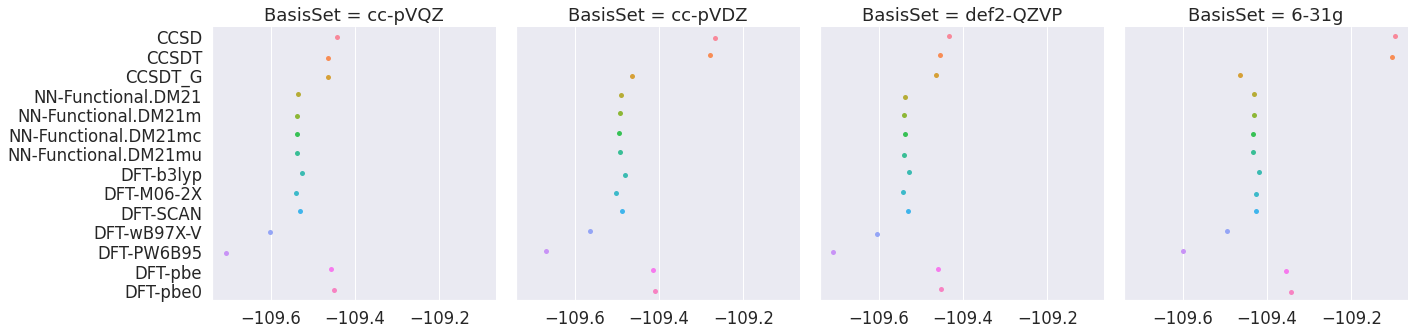

In [86]:
from matplotlib import pyplot
import seaborn

 

chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplot2 ,  col="BasisSet")


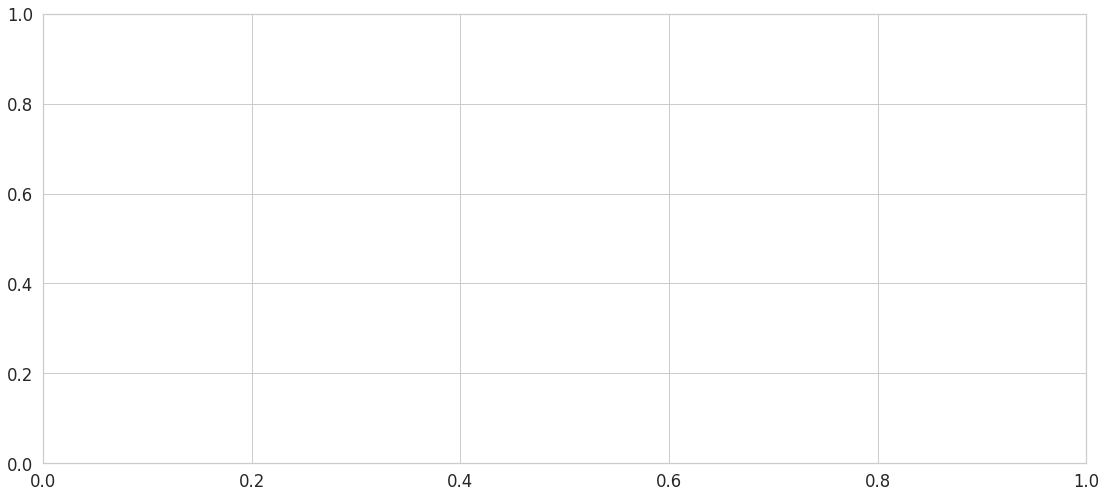

In [87]:
from matplotlib import pyplot
import seaborn

sns.set_style("white")
sns.set_style("whitegrid")



#sns.color_palette("hls", 4)
sns.color_palette("viridis", as_cmap=True)
sns.color_palette("Paired")


chartsize = (18.7, 8.27)

fig, ax = pyplot.subplots(figsize=chartsize)
sns.set(font_scale=2)
sns.axes_style()

sns.set_style("darkgrid", {"axes.facecolor": ".3"})

#sns.barplot( orient='h' ,    data=dfplot2)


In [88]:
dfplotMain1 = df[listofcolumstoplot]

In [89]:
listofcolumstoplot2

['BasisSet',
 'CCSD',
 'CCSDT',
 'CCSDT_G',
 'NN-Functional.DM21',
 'NN-Functional.DM21m',
 'NN-Functional.DM21mc',
 'NN-Functional.DM21mu',
 'DFT-b3lyp',
 'DFT-M06-2X',
 'DFT-SCAN',
 'DFT-wB97X-V',
 'DFT-PW6B95',
 'DFT-pbe',
 'DFT-pbe0']

In [90]:
listofcolumstoplot2.remove('CCSDT_G')


In [91]:
 
dfplotMain2 = df[listofcolumstoplot2 ]
dfplotMain2

,BasisSet,CCSD,CCSDT,NN-Functional.DM21,NN-Functional.DM21m,NN-Functional.DM21mc,NN-Functional.DM21mu,DFT-b3lyp,DFT-M06-2X,DFT-SCAN,DFT-wB97X-V,DFT-PW6B95,DFT-pbe,DFT-pbe0
0,cc-pVQZ,-109.442893,-109.463793,-109.535539,-109.537701,-109.537078,-109.537155,-109.524641,-109.538803,-109.529188,-109.601901,-109.706725,-109.455650,-109.449469
1,cc-pVDZ,-109.267243,-109.279191,-109.490796,-109.491940,-109.494445,-109.491373,-109.481039,-109.502551,-109.488362,-109.562545,-109.666747,-109.413419,-109.410406
2,def2-QZVP,-109.434246,-109.455003,-109.537548,-109.539957,-109.538454,-109.539406,-109.526752,-109.542669,-109.530916,-109.603708,-109.708843,-109.458030,-109.451263
3,6-31g,-109.095583,-109.103177,-109.431051,-109.431542,-109.432852,-109.432519,-109.417711,-109.426865,-109.425552,-109.494641,-109.600030,-109.353838,-109.343801


In [92]:
dfplotMain1

,BasisSet,M-NN-Functional.DM21,M-NN-Functional.DM21m,M-NN-Functional.DM21mc,M-NN-Functional.DM21mu,M-DFT-b3lyp,M-DFT-M06-2X,M-DFT-SCAN,M-DFT-wB97X-V,M-DFT-PW6B95,M-DFT-pbe,M-DFT-pbe0
0,cc-pVQZ,0.071746,0.073908,0.073285,0.073362,0.060847,0.075010,0.065395,0.138108,0.242932,0.008143,0.014324
1,cc-pVDZ,0.211605,0.212749,0.215254,0.212181,0.201848,0.223360,0.209171,0.283353,0.387556,0.134228,0.131215
2,def2-QZVP,0.082545,0.084954,0.083451,0.084403,0.071749,0.087666,0.075913,0.148705,0.253840,0.003027,0.003740
3,6-31g,0.327874,0.328365,0.329675,0.329342,0.314534,0.323688,0.322375,0.391464,0.496853,0.250661,0.240624


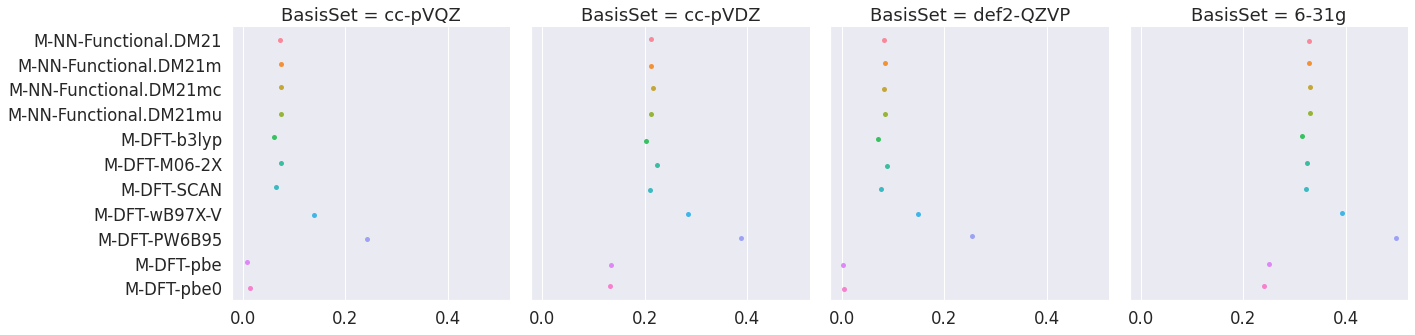

In [93]:
from matplotlib import pyplot
import seaborn

 

chartsize = (18.7, 16.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplotMain1 ,  col="BasisSet")


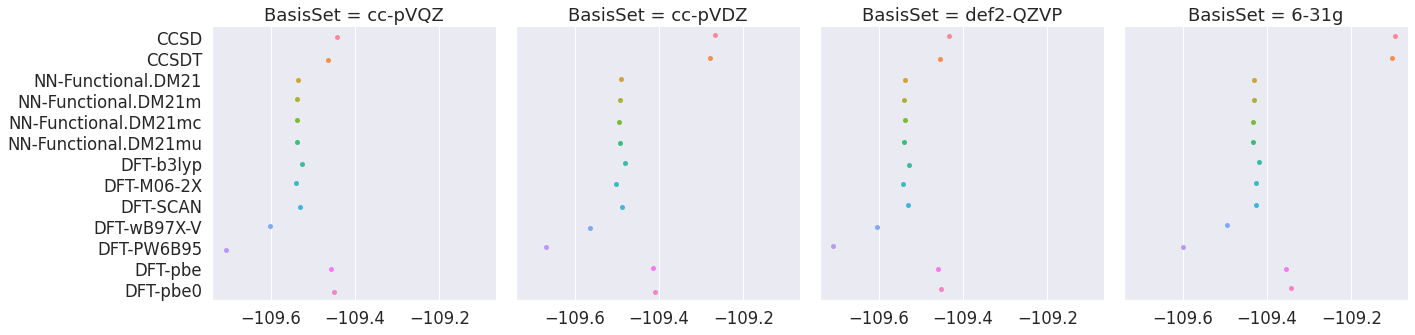

In [94]:
from matplotlib import pyplot
import seaborn

 

chartsize = (28.7, 26.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplotMain2 ,  col="BasisSet")


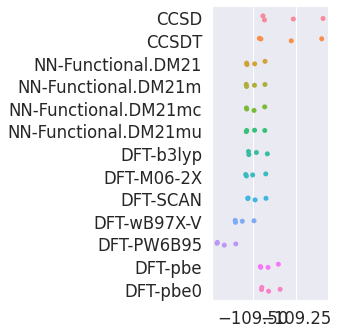

In [95]:
from matplotlib import pyplot
import seaborn

 

chartsize = (28.7, 26.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.catplot( orient='h' ,    data=dfplotMain2 )


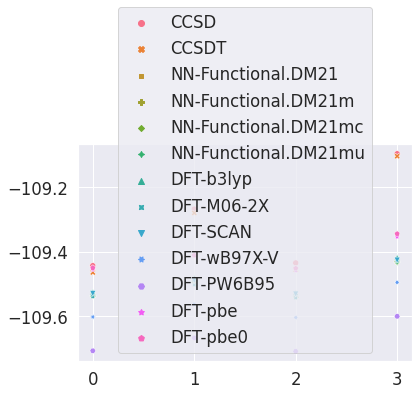

In [96]:
from matplotlib import pyplot
import seaborn

 

chartsize = (28.7, 26.27)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

#fig, ax = pyplot.subplots(figsize=chartsize)
#ax.set_xlim(dfplot2.min(axis =1, numeric_only=True).min(), dfplot2.max(axis =1, numeric_only=True).max() )
sns.scatterplot(    data=dfplotMain2 , sizes=(40, 40) )


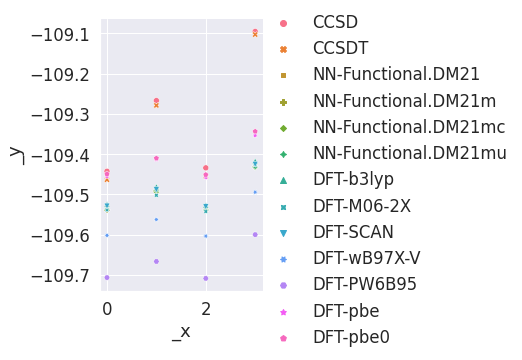

In [97]:
sns.relplot(
    data=dfplotMain2,  
    kind="scatter"
)

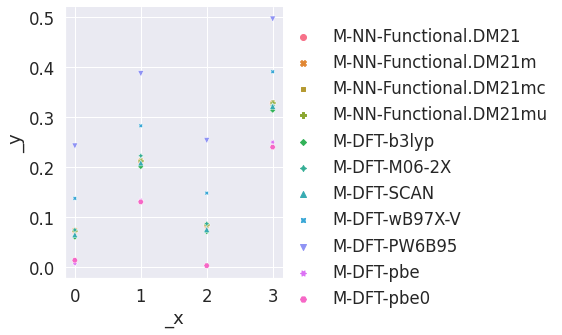

In [98]:
sns.relplot(
    data=dfplotMain1,  
    kind="scatter"
)